In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels
from heatmapannot import heatmapannot


%load_ext autoreload
%autoreload 2

### Example 1: Heatmap

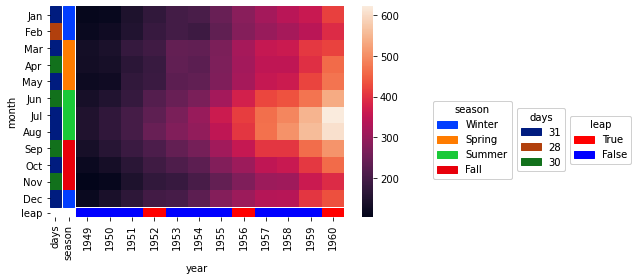

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from heatmapannot import heatmapannot

#load "flights" dataset
df = sns.load_dataset("flights")

# Add some features to month and year
monthToSeason = {"Jan":"Winter", "Feb":"Winter", "Mar":"Spring", "Apr":"Spring", "May":"Spring",
                "Jun":"Summer", "Jul":"Summer", "Aug":"Summer", "Sep":"Fall", "Oct":"Fall", "Nov":"Fall",
                "Dec":"Winter"}
monthToDays = {"Jan":31, "Feb":28, "Mar":31, "Apr":30, "May":31,
                "Jun":30, "Jul":31, "Aug":31, "Sep":30, "Oct":31, "Nov":30,
                "Dec":31}
df["season"] = df["month"].map(monthToSeason)
df["days"] = df["month"].map(monthToDays)
df["leap"] = df["year"].map(lambda x: x%4==0)
heatmapdf = df.pivot("month", "year", "passengers")

# Plot the heatmap
sns.heatmap(heatmapdf)
heatmapannot.AddHeatmapAnnot(data=df, heatmap_row="month", heatmap_col="year",
                            row_features = ["season", "days"], col_features = ["leap"],
                            row_palettes = ["bright", "dark"], col_colormaps = [{True:"r", False:"b"}])
plt.tight_layout()

### Example 2: heatmap with dendrogram (adapted from https://seaborn.pydata.org/examples/structured_heatmap.html)

((380.0, 0.0), (398.00000000000006, 0.0))

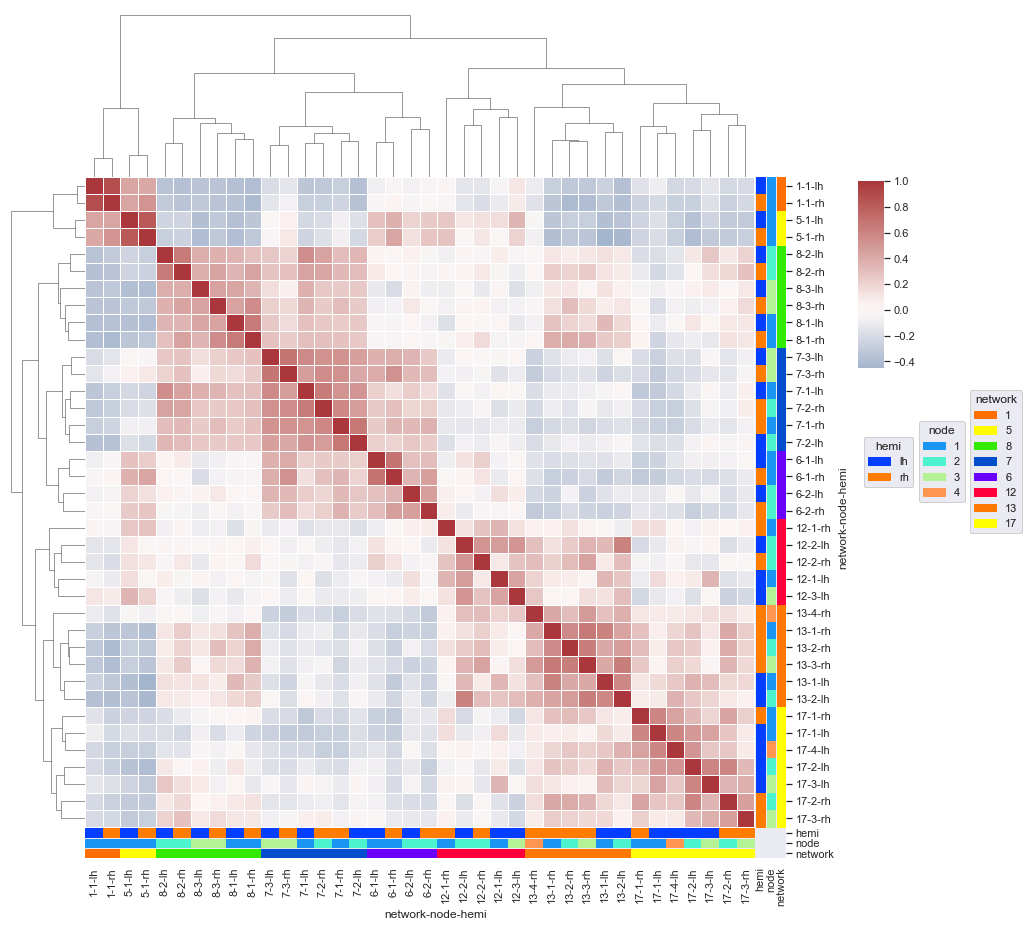

In [117]:
import pandas as pd
import seaborn as sns
sns.set_theme()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
g = sns.clustermap(df.corr(), center=0, cmap="vlag",
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(1, 0.6, .03, .2),
                   linewidths=.75, figsize=(12, 13))

#g.ax_row_dendrogram.remove()

tickDf = pd.DataFrame()
tickDf["tick"] = ["-".join(c) for c in df.columns]
for i,l in enumerate(df.columns.levels):
    tickDf[l.name] = [c[i] for c in df.columns]
colormaps, origXlim, origYlim, newXlim, newYlim = heatmapannot.AddHeatmapAnnot(data=tickDf, heatmap_row="tick", heatmap_col="tick",
                            row_features = ["hemi", "node", "network"],
                            row_palettes = ["bright", "rainbow", "prism"],
                            row_anchors = [1, 1, 1],
                            col_features = ["hemi", "node", "network"],
                            col_palettes = ["bright", "rainbow", "prism"],
                            col_anchors = [1, 1, 1],
                            hide_legends = [3,4,5],
                            ax=g.ax_heatmap)
# We need to realign the dendrogram axes
# Done by mannually
#g.ax_col_dendrogram.set(xlim=(0,400))
#g.ax_row_dendrogram.set(ylim=(400,0))
# heatmapannot also provides the function for automatic adjustment
heatmapannot.AdjustAxes(g.ax_col_dendrogram, "col", origXlim, newXlim)
heatmapannot.AdjustAxes(g.ax_row_dendrogram, "row", origYlim, newYlim)